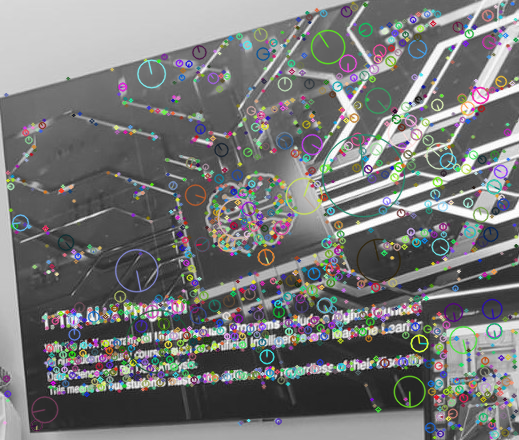

In [4]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

# Load an image
gray = cv2.imread(r"/content/img11.jpeg", cv2.IMREAD_GRAYSCALE)

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors
keypoints, descriptors = sift.detectAndCompute(gray, None)

# Draw keypoints on the image
img_keypoints = cv2.drawKeypoints(gray, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv2_imshow(img_keypoints)
cv2.waitKey(0)
cv2.destroyAllWindows()

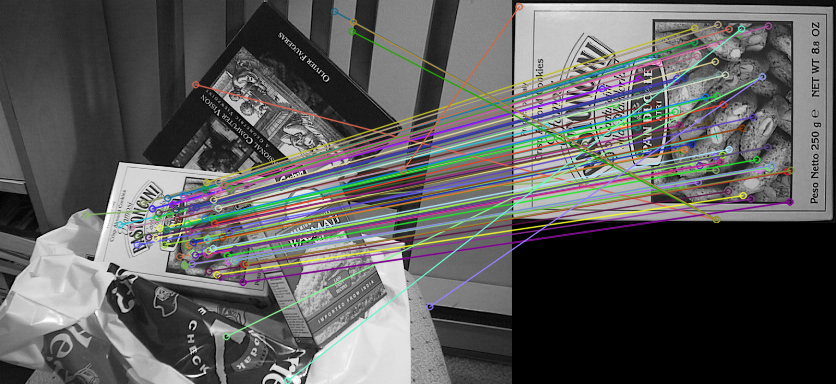

In [6]:
gray1 = cv2.imread(r'/content/box_in_scene.png', cv2.IMREAD_GRAYSCALE)
gray2 = cv2.imread(r'/content/box.png', cv2.IMREAD_GRAYSCALE)

# Detect and compute features
sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(gray1, None)
kp2, des2 = sift.detectAndCompute(gray2, None)

# Use BFMatcher for feature matching
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

# Apply ratio test (Lowe's ratio test)
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

# Draw matches
img_matches = cv2.drawMatches(gray1, kp1, gray2, kp2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

cv2_imshow(img_matches)
cv2.waitKey(0)
cv2.destroyAllWindows()